In [622]:
#1) Import the necessary libraries

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from os import system

In [623]:
#2) Read the data as a data frame

bank= pd.read_csv("Bank Full.csv")

In [624]:
#3) Perform basic EDA which should include the following and print out your insights at every step.

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [625]:
#) Shape of the data

bank.shape

(45211, 17)

In [626]:
#) Data type of each attribute

bank.dtypes

#) Since categorical data is being read as object datatype, we will change it to categorical datatype:

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [627]:
#) Converting object datatype variables to integer datatype variables.

for feature in bank.columns: # Loop through all columns in the dataframe
    if bank[feature].dtype == 'object': # Only applying to columns with categorical strings
        bank[feature] = pd.Categorical(bank[feature]) # Replacing strings with an integer
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [628]:
#) Checking the presence of missing values

bank.isnull().values.any()

False

In [629]:
#) 5 Point summary of numerical attributes

bank.describe().transpose()

# Looking at the table below, all the columns have outliers present in them.

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [630]:
#) Checking the presence of outliers

cols = bank.columns
num_cols = bank._get_numeric_data().columns 

bank[np.abs(bank.age-bank.age.mean()) <= (3*bank.age.std())]
bank[np.abs(bank.balance-bank.balance.mean()) <= (3*bank.balance.std())]
bank[np.abs(bank.day-bank.day.mean()) <= (3*bank.day.std())]
bank[np.abs(bank.duration-bank.duration.mean()) <= (3*bank.duration.std())]
bank[np.abs(bank.campaign-bank.campaign.mean()) <= (3*bank.campaign.std())]
bank[np.abs(bank.pdays-bank.pdays.mean()) <= (3*bank.pdays.std())]
bank[np.abs(bank.previous-bank.previous.mean()) <= (3*bank.previous.std())]

# Outliers can be seen below and they are a lot.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


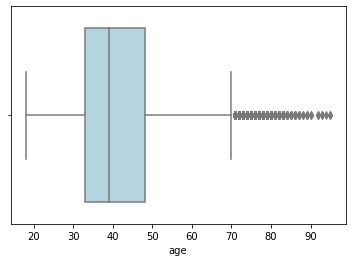

In [631]:
# We can see this through box plot as well, detailed below for each numeric column:

sns.boxplot(x= bank.age, color='lightblue')

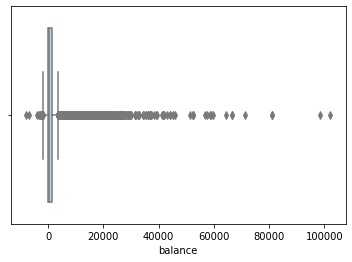

In [632]:
sns.boxplot(x=bank.balance, color='lightblue')

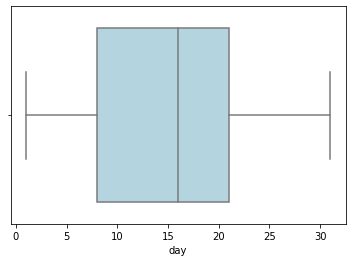

In [633]:
sns.boxplot(x= bank.day, color='lightblue')

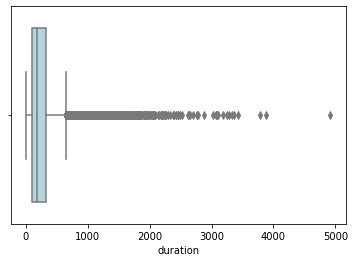

In [634]:
sns.boxplot(x= bank.duration, color='lightblue')

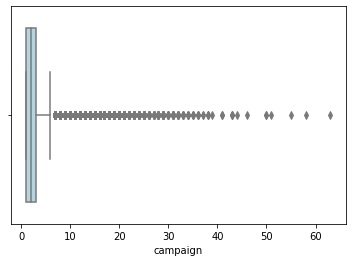

In [635]:
sns.boxplot(x= bank.campaign, color='lightblue')

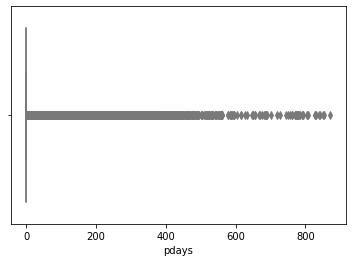

In [636]:
sns.boxplot(x= bank.pdays, color='lightblue')

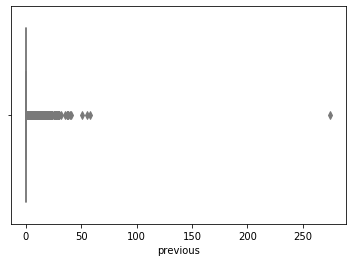

In [637]:
sns.boxplot(x= bank.previous, color='lightblue')

In [638]:
#) Except days, all the columns have lot of outliers and very few data within interquantile ranges.

In [639]:
bank.drop('duration', axis=1, inplace=True) #Since duration is not important for predictive modelling hence dropping it

In [640]:
#4) Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc. (

replaceStruct = {
                "job": {"admin.": 1, "blue-collar": 2 ,"entrepreneur": 3 ,"housemaid":4 , "management":5, "retired":6, "self-employed":7 , "services":8, "student":9, "technician":10, "unemployed": 11, "unknown":0},
                "marital": {"divorced": 1, "married":2 , "single": 3},
                "default": {"yes": 1, "no": 2}, 
                "poutcome": {"failure": 1, "other": 2, "success": 3, "unknown": 0},    
                "housing": {"yes": 1, "no": 2 },
                "month": {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12},
                "Target": {"no": 0, "yes": 1},
                    }

#"contact": {"cellular":1, "telephone":2, "unknown":-1},
#"education": {"primary": 1, "secondary":2 , "tertiary": 3, "unknown": -1},
#"loan": {"yes": 1, "no": 2}

oneHotCols=["contact","education","loan"]

In [641]:
bank=bank.replace(replaceStruct)
bank=pd.get_dummies(bank)
bank.head(10)

,age,job,marital,default,balance,housing,day,month,campaign,pdays,...,Target,education_primary,education_secondary,education_tertiary,education_unknown,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,58,5,2,2,2143,1,5,5,1,-1,...,0,0,0,1,0,1,0,0,0,1
1,44,10,3,2,29,1,5,5,1,-1,...,0,0,1,0,0,1,0,0,0,1
2,33,3,2,2,2,1,5,5,1,-1,...,0,0,1,0,0,0,1,0,0,1
3,47,2,2,2,1506,1,5,5,1,-1,...,0,0,0,0,1,1,0,0,0,1
4,33,0,3,2,1,2,5,5,1,-1,...,0,0,0,0,1,1,0,0,0,1
5,35,5,2,2,231,1,5,5,1,-1,...,0,0,0,1,0,1,0,0,0,1
6,28,5,3,2,447,1,5,5,1,-1,...,0,0,0,1,0,0,1,0,0,1
7,42,3,1,1,2,1,5,5,1,-1,...,0,0,0,1,0,1,0,0,0,1
8,58,6,2,2,121,1,5,5,1,-1,...,0,1,0,0,0,1,0,0,0,1
9,43,10,3,2,593,1,5,5,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [642]:
# Calculating ratio of people with and without subscribed term deposit

n_true = len(bank.loc[bank['Target'] == True])
n_false = len(bank.loc[bank['Target'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 5289 (11.70%)
Number of false cases: 39922 (88.30%)


In [643]:
X = bank.drop("Target", axis=1)
y = bank.pop("Target")

In [644]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
X_train.head()

,age,job,marital,default,balance,housing,day,month,campaign,pdays,...,poutcome,education_primary,education_secondary,education_tertiary,education_unknown,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
6149,32,2,2,1,-238,1,27,5,1,-1,...,0,0,1,0,0,1,0,0,0,1
12403,34,1,3,2,-478,1,27,6,4,-1,...,0,0,1,0,0,0,1,0,0,1
21645,32,10,2,2,266,1,19,8,2,-1,...,0,0,1,0,0,1,0,1,0,0
29580,36,2,2,1,13,2,3,2,4,-1,...,0,0,1,0,0,0,1,1,0,0
31245,23,9,3,2,486,2,3,3,1,-1,...,0,0,1,0,0,1,0,1,0,0


In [645]:
#5) Train a few standard classification algorithms, note and comment on their performances across different classification metrics.

#Logistic Regression

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on train

model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

#predict on test

y_predict = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.001891  0.006537  0.115225 -0.826023  0.000025  0.621381 -0.007991   

         7         8         9  ...        12        13        14        15  \
0 -0.00991 -0.112055 -0.002114  ... -0.456662 -0.238321 -0.117805 -0.078507   

         16        17        18        19        20  intercept  
0 -0.178175 -0.713121  0.062411 -0.038374 -0.915333  -0.891296  

[1 rows x 22 columns]


In [646]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8942789737540549


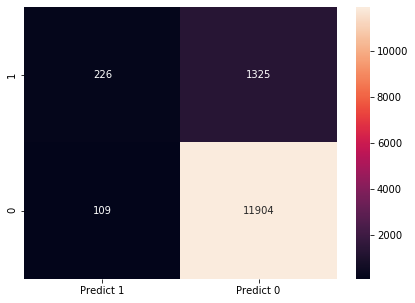

In [647]:
#) Confusion matrix- Logistic Regression

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [648]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.15      0.24      1551
           0       0.90      0.99      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564



In [649]:
# The confusion matrix:

# True Positives (TP): we correctly predicted that clients subscribed a term deposit- 226

# True Negatives (TN): we correctly predicted that clients did not subscribe a term deposit- 11904

# False Positives (FP): we incorrectly predicted that clients subscribed a term deposit (a "Type I error")- 109 False positive predicts

# False Negatives (FN): we incorrectly predicted that clients did not subscribe a term deposit (a "Type II error")- 1325 Falsely negative predicts

In [650]:
#) KNN

from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [651]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8762901798879387

Confusion Matrix


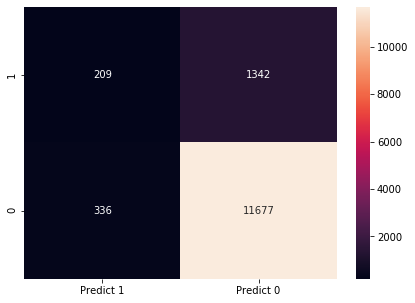

In [652]:
from sklearn import metrics

print("Confusion Matrix")

cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [653]:
# The confusion matrix:

# True Positives (TP): we correctly predicted that clients subscribed a term deposit- 209

# True Negatives (TN): we correctly predicted that clients did not subscribe a term deposit- 11677

# False Positives (FP): we incorrectly predicted that clients subscribed a term deposit (a "Type I error")- 336 False positive predicts

# False Negatives (FN): we incorrectly predicted that clients did not subscribe a term deposit (a "Type II error")- 1342 Falsely negative predicts

In [654]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.38      0.13      0.20      1551
           0       0.90      0.97      0.93     12013

    accuracy                           0.88     13564
   macro avg       0.64      0.55      0.57     13564
weighted avg       0.84      0.88      0.85     13564



In [655]:
#) Naïve Bayes

from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
target_model = GaussianNB()
target_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [656]:
target_train_predict = target_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, target_train_predict)))
print()

Model Accuracy: 0.7946



In [657]:
target_test_predict = target_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, target_test_predict)))
print()

Model Accuracy: 0.7985



Confusion Matrix


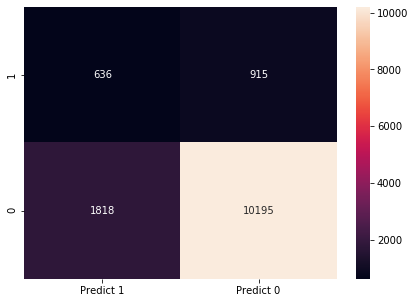

In [658]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, target_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [659]:
# The confusion matrix:

# True Positives (TP): we correctly predicted that clients subscribed a term deposit- 636

# True Negatives (TN): we correctly predicted that clients did not subscribe a term deposit- 10195

# False Positives (FP): we incorrectly predicted that clients subscribed a term deposit (a "Type I error")- 1818 False positive predicts

# False Negatives (FN): we incorrectly predicted that clients did not subscribe a term deposit (a "Type II error")- 915 Falsely negative predicts

In [660]:
print("Classification Report")
print(metrics.classification_report(y_test, target_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.26      0.41      0.32      1551
           0       0.92      0.85      0.88     12013

    accuracy                           0.80     13564
   macro avg       0.59      0.63      0.60     13564
weighted avg       0.84      0.80      0.82     13564



In [661]:
#) Best model in this case

# Naïve Bayes: We can see that the number of true positives and true negatives are the highets out of the three models tested.
# Naïve Bayes also has the lowest accuracy compared to other two algorithms.
# KNN performed the worst with lowest true positives but prediced highest true negatives.
# Logistic looks in the middle of the two classfication algorithms but presente highest accuracy.

In [662]:
#6) Build the ensemble models and compare the results with the base models.

In [663]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [664]:
#) Scoring the decision tree

print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))  #) Scoring the decision tree

1.0
0.8301386021822471


In [665]:
#) Reducing over fitting (Regularization)

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8922488703510602
0.8957534650545562


In [666]:
# Finding Gini importance

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                          Imp
age                  0.125467
job                  0.000000
marital              0.000000
default              0.000000
balance              0.000000
housing              0.019173
day                  0.004651
month                0.000000
campaign             0.007095
pdays                0.004051
previous             0.000000
poutcome             0.754687
education_primary    0.000000
education_secondary  0.000000
education_tertiary   0.000000
education_unknown    0.000000
loan_no              0.000000
loan_yes             0.000000
contact_cellular     0.000000
contact_telephone    0.000000
contact_unknown      0.084877


0.8957534650545562


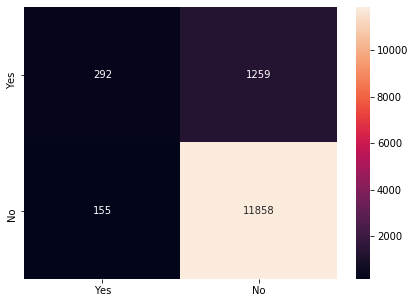

In [667]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [668]:
#) Ensemble Learning - Bagging

from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

0.8914774402831024


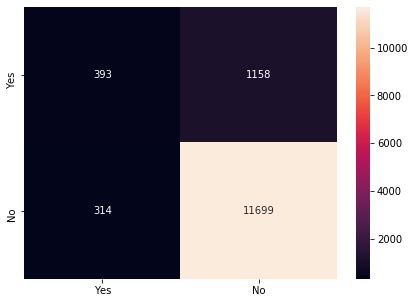

In [669]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [670]:
#) Ensemble Learning - AdaBoosting

from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8956797404895311


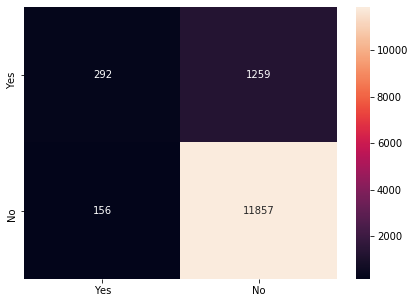

In [671]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [672]:
#) Ensemble Learning - GradientBoost

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8950162194043055


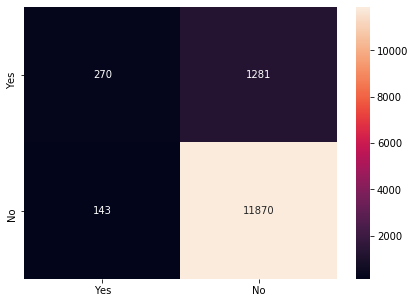

In [673]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [674]:
#) Ensemble RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.8925095841934533


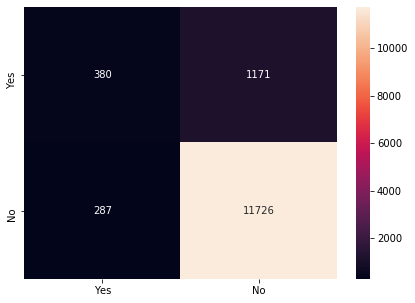

In [675]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [676]:
#7) Compare performances of all the models

#) From the above models, all have very minute difference in their score.
#) AdaBoosting shows highest score, with highest number of true positives.
#) Bagging had the highest number of true positives.
#) RandomForest Classifier (RFCL) also presents good true positives and true negatives.
#) Hence, any one of the above models can be a good fit for this data, as they do not have much difference.